# 1. Data Curation

In [210]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# https://www.kaggle.com/ruiqurm/lianjia
df = pd.read_csv("dataset.csv")
df.head(5)

,Lng,Lat,tradeTime,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,buildingStructure,ladderRatio,elevator,subway
0,116.475489,40.019520,2016.8.9,415.0,31680,131.00,2,1,1,1,멕 26,1.0,2005,6,0.217,1,1
1,116.453917,39.881534,2016.7.28,575.0,43436,132.38,2,2,1,2,멕 22,1.0,2004,6,0.667,1,0
2,116.561978,39.877145,2016.12.11,1030.0,52021,198.00,3,2,1,3,櫓 4,4.0,2005,6,0.500,1,0
3,116.438010,40.076114,2016.9.30,297.5,22202,134.00,3,1,1,1,뒀 21,1.0,2008,6,0.273,1,0
4,116.428392,39.886229,2016.8.28,392.0,48396,81.00,2,1,1,1,櫓 6,4.0,1960,2,0.333,0,1


# 2. Data Inspection

In [211]:
print(df.shape)
print(df.describe(include='all'))
print(df.info())

(134267, 17)
                  Lng            Lat  tradeTime     totalPrice          price  \
count   134267.000000  134267.000000     134267  134267.000000  134267.000000   
unique            NaN            NaN        731            NaN            NaN   
top               NaN            NaN  2016.2.28            NaN            NaN   
freq              NaN            NaN       1096            NaN            NaN   
mean       116.412490      39.949579        NaN     446.865677   55843.083289   
std          0.112072       0.098895        NaN     269.777014   23845.832190   
min        116.072514      39.627030        NaN       1.000000     117.000000   
25%        116.342217      39.890394        NaN     280.000000   38344.000000   
50%        116.416156      39.934073        NaN     388.000000   51115.000000   
75%        116.476546      40.006907        NaN     537.000000   69026.500000   
max        116.732378      40.252758        NaN   18130.000000  150000.000000   

              

In [212]:
# missing data
print(df.isnull().sum()) # check missing data

Lng                     0
Lat                     0
tradeTime               0
totalPrice              0
price                   0
square                  0
livingRoom              0
drawingRoom             0
kitchen                 0
bathRoom                0
floor                   0
buildingType         1248
constructionTime        0
buildingStructure       0
ladderRatio             0
elevator                0
subway                  0
dtype: int64


# 3. Data Preprocessing

## 1) Data Restructuring

In [213]:
# table vertical decomposition
# remove feature do not affect on calculationg house price
df.drop(['tradeTime', 'price'], 1, inplace=True)
df.head(5)

,Lng,Lat,totalPrice,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,buildingStructure,ladderRatio,elevator,subway
0,116.475489,40.019520,415.0,131.00,2,1,1,1,멕 26,1.0,2005,6,0.217,1,1
1,116.453917,39.881534,575.0,132.38,2,2,1,2,멕 22,1.0,2004,6,0.667,1,0
2,116.561978,39.877145,1030.0,198.00,3,2,1,3,櫓 4,4.0,2005,6,0.500,1,0
3,116.438010,40.076114,297.5,134.00,3,1,1,1,뒀 21,1.0,2008,6,0.273,1,0
4,116.428392,39.886229,392.0,81.00,2,1,1,1,櫓 6,4.0,1960,2,0.333,0,1


## 2) Data Value Changes

* Cleaning dirty data

In [214]:
# tokenization
# Text tokenization the floor, constructionTime
df['floor'] = df.floor.str.extract('(\d+)')
df['floor'] = pd.to_numeric(df['floor'])
df['constructionTime'] = df.constructionTime.str.extract('(\d+)')
df['constructionTime'] = pd.to_numeric(df['constructionTime'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134267 entries, 0 to 134266
Data columns (total 15 columns):
Lng                  134267 non-null float64
Lat                  134267 non-null float64
totalPrice           134267 non-null float64
square               134267 non-null float64
livingRoom           134267 non-null int64
drawingRoom          134267 non-null int64
kitchen              134267 non-null int64
bathRoom             134267 non-null int64
floor                134267 non-null int64
buildingType         133019 non-null float64
constructionTime     128621 non-null float64
buildingStructure    134267 non-null int64
ladderRatio          134267 non-null float64
elevator             134267 non-null int64
subway               134267 non-null int64
dtypes: float64(7), int64(8)
memory usage: 15.4 MB
None


In [215]:
# Unusable data : replace 'Unknown' to NaN
print("-- missing data before removal -- ")
print("Total data : ", len(df))
print(df.isnull().sum()) # check missing data
df = df.dropna(axis=0) # NaN가 있는 행 삭제
print("-- missing data after removal -- ")
print("Total data : ", len(df))
print(df.isnull().sum()) # check missing data

-- missing data before removal -- 
Total data :  134267
Lng                     0
Lat                     0
totalPrice              0
square                  0
livingRoom              0
drawingRoom             0
kitchen                 0
bathRoom                0
floor                   0
buildingType         1248
constructionTime     5646
buildingStructure       0
ladderRatio             0
elevator                0
subway                  0
dtype: int64
-- missing data after removal -- 
Total data :  127671
Lng                  0
Lat                  0
totalPrice           0
square               0
livingRoom           0
drawingRoom          0
kitchen              0
bathRoom             0
floor                0
buildingType         0
constructionTime     0
buildingStructure    0
ladderRatio          0
elevator             0
subway               0
dtype: int64


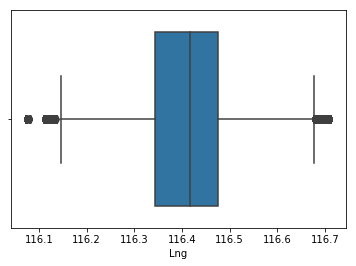

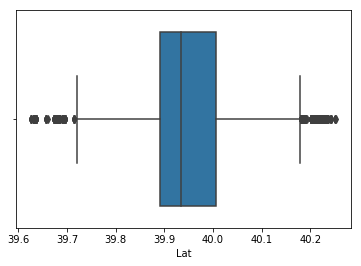

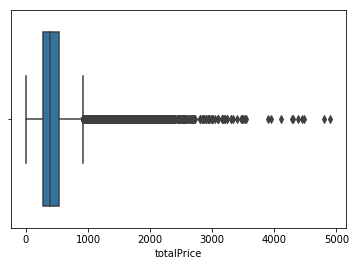

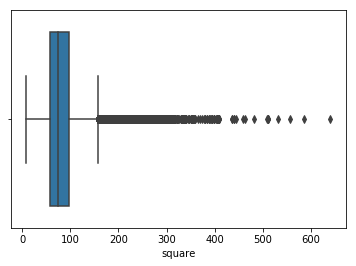

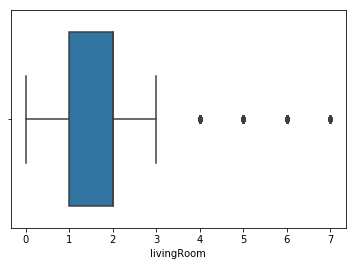

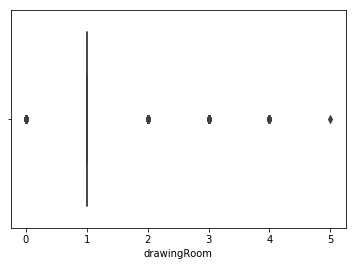

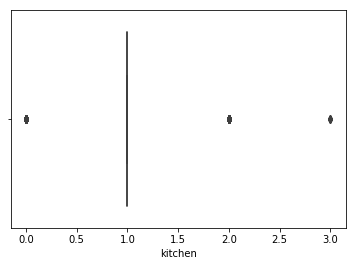

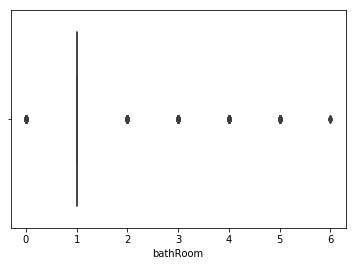

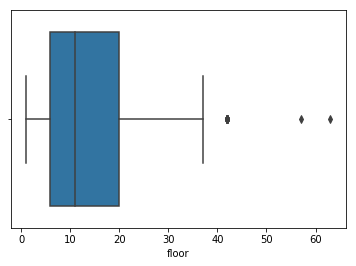

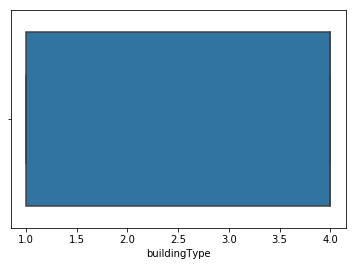

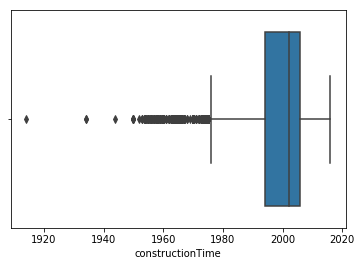

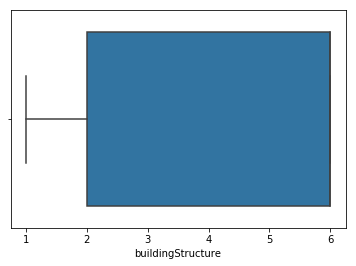

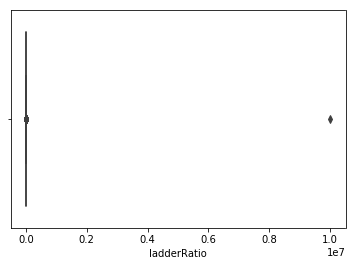

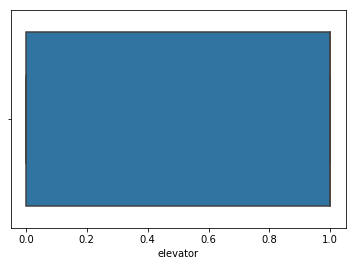

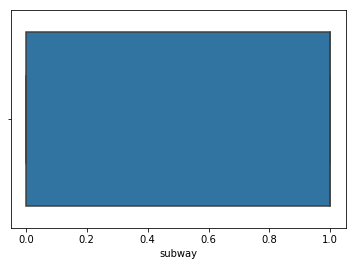

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df:
    sns.boxplot(df[column])
    plt.show()
    
# # Outliers
# df = df[df['totalPrice'] < 7500]
# df = df[df['square'] < 750]
# df = df[df['ladderRatio'] < 100]

* Encoding for data mining algorithms

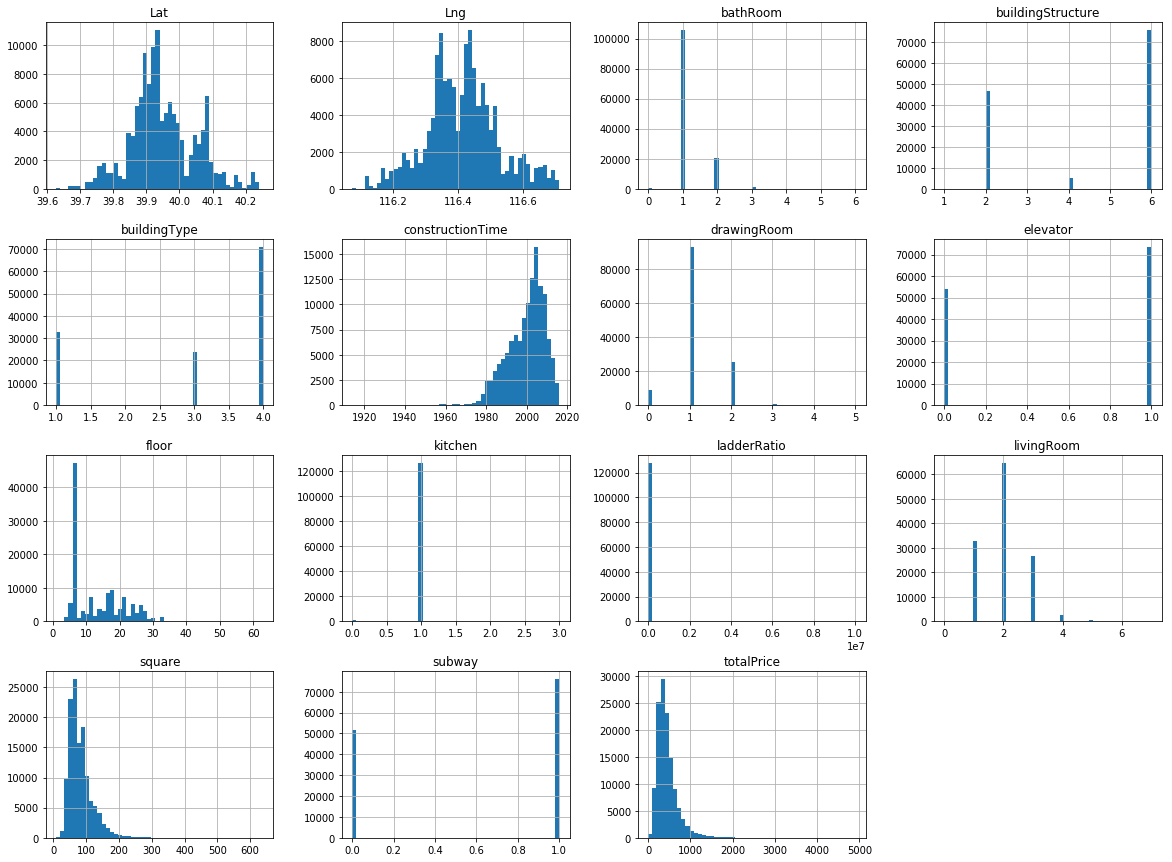

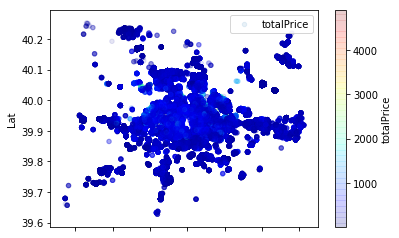

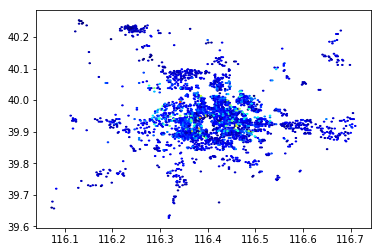

In [219]:
# preprocessing result
df.hist(bins=50, figsize=(20,15))
plt.show()

df.plot(kind="scatter", x="Lng", y="Lat", alpha=0.1, label="totalPrice", c="totalPrice", cmap=plt.get_cmap("jet"), colorbar=True)
plt.show()

import numpy as np
# Make the plot
plt.hexbin(x=df['Lng'], y=df['Lat'], C=df['totalPrice'], reduce_C_function=np.std, gridsize=200, cmap=plt.get_cmap("jet"))
plt.show()

# 4. Data Analysis

In [227]:
# classifier attribute to target
feature = df.drop(columns=['totalPrice'])
label = df['totalPrice']

# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(feature, label, test_size=0.2, random_state=0)

def Regression_(reg_):
    reg_.fit(X_train, y_train)
    MSE(reg_, X_train, y_train, X_test, y_test)

#Mean Squared Error
def MSE(fit, X_train, y_train, X_test, y_test):
    predict_y = fit.predict(X_test)
    print("MSE: %.2f" % np.sqrt(np.mean((predict_y - y_test) ** 2)))
    # Explained variance score: 1 is perfect prediction
    print('Train Variance score: %.2f' % fit.score(X_train, y_train))
    print('Test Variance score: %.2f' % fit.score(X_test, y_test))

print('\nLinearRegression:')
from sklearn.linear_model import LinearRegression
Regression_(LinearRegression())

print('\nDecisionTreeRegressor:')
from sklearn.tree import DecisionTreeRegressor
Regression_(DecisionTreeRegressor())

print('\nRandomForestRegressor:')
from sklearn.ensemble import RandomForestRegressor
Regression_(RandomForestRegressor(n_estimators = 5))

print('\nExtraTreesRegressor:')
from sklearn.ensemble import ExtraTreesRegressor
Regression_(ExtraTreesRegressor(n_estimators = 5))

print('\nAdaBoostRegressor:')
from sklearn.ensemble import AdaBoostRegressor
Regression_(AdaBoostRegressor(n_estimators = 5))

print('\nGradientBoostingRegressor:')
from sklearn.ensemble import GradientBoostingRegressor
Regression_(GradientBoostingRegressor(n_estimators = 5))


LinearRegression:
MSE: 188.42
Train Variance score: 0.46
Test Variance score: 0.47

DecisionTreeRegressor:
MSE: 140.48
Train Variance score: 0.98
Test Variance score: 0.71

RandomForestRegressor:
MSE: 117.43
Train Variance score: 0.94
Test Variance score: 0.79

ExtraTreesRegressor:
MSE: 123.65
Train Variance score: 0.98
Test Variance score: 0.77

AdaBoostRegressor:
MSE: 186.13
Train Variance score: 0.48
Test Variance score: 0.48

GradientBoostingRegressor:
MSE: 215.67
Train Variance score: 0.30
Test Variance score: 0.31
